<div align="right">Python 2.7 Jupyter Notebook</div>

# Collect your own data

### Your completion of the notebook exercises will be graded based on your ability to do the following:

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

#### Notebook objectives
By the end of this notebook, you will be expected to:
> 
  - Manually perform exploratory data analysis on call data;
  - Leverage the Bandicoot module to automate analysis; and
  - Know resources for building your own Funf applications.
    
####  List of exercises
>   
- **Exercise 1**: Using Bandicoot for analysis.
- **Exercise 2**: Interpreting calls of zero duration in call records.

# Notebook introduction

This notebook introduces two tools that will be discussed in detail in upcoming video content. You can complete the exercise using the sample dataset or generate your own using the instructions below, if you have access to an Android device.


To demonstrate the different lengths of time it takes to gain insights when performing an analysis, you will start to explore the provided dataset (or your own) through a manual analysis cycle, before switching to automated analysis using the Bandicoot framework. You will be introduced to this tool in more detail in Module 5.

<div class="alert alert-warning">
<b>Note</b>:<br>
It is strongly recommended that you save and checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.
</div>

#### Load libraries and set options

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import os
import bandicoot as bc
from IPython.display import IFrame
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)

## 1. Collect your own data

This notebook begins with an example dataset, on which you will perform similar activities to those demonstrated in Section 1 of Module 2's Notebook 2. You are welcome to share your dataset with fellow students, in cases where they do not have access to android devices, if you are comfortable to do so.

> Building applications is a separate topic, and you will begin with using another open source project from MIT to process your data in a format that can be utilized for analysis.

[Bandicoot](http://bandicoot.mit.edu/) is an open-source Python toolbox, which analyzes mobile phone metadata. This section demonstrates how it can be used to collect your own data. Additional examples, as well as how Bandicoot is used to analyze mobile phone data, will be demonstrated in Module 5.

***If you have an Android phone***, you can export your own metadata by following these steps:
1. Go to http://bandicoot.mit.edu/android and install the application on your phone;
2. Export your data, email it to yourself, and upload the CSV file to the "data" directory in "module_2" on your virtual analysis environment.
3. You can then complete the example using your own dataset.

> **Note**:

> You can upload files from the directory view in your Jupyter notebook. Ensure that you select the file and then click "upload" to start the upload process.

> ![Uploading files screenshot](Upload_01.png "Screenshot of uploading files")

***If you do not have access to an Android phone***, a file, named "metadata_sample.csv", in the "data" directory under "module_2", has been provided that you can use for your analysis. Bandicoot is not available on Apple phones due to restrictions in the operating system.

### 1.1 Loading the data

First, load the supplied CSV file using additional options in the Pandas read_csv function. It is possible to set the index, and instruct the function to parse the datetime column when loading the file. You can read more about the function in the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [2]:
# Load the dataset.
#     You can change the filename to reflect the name of your generated dataset,
#     if you downloaded the application in the previous step. The default filename
#     is "metadata.csv".
calls = pd.read_csv("data/metadata_sample.csv",parse_dates=['datetime'],
                    index_col=['datetime'])

Review the data.

In [3]:
calls.head(5)

,interaction,direction,correspondent_id,call_duration,antenna_id
datetime,,,,,
2016-06-21 08:20:07,call,out,fed079947094d088440b53367bca7653ee7e62e7,NaN,NaN
2016-06-21 08:21:52,text,in,8fea1791eba929dbae3bddfe64861f86679deeaf,NaN,NaN
2016-06-21 08:22:23,call,out,fed079947094d088440b53367bca7653ee7e62e7,3.0,NaN
2016-06-21 08:23:03,call,out,effc58da851b9ab004194a8c74998802d0bcca45,NaN,NaN
2016-06-21 08:23:27,call,out,fed079947094d088440b53367bca7653ee7e62e7,2.0,NaN


### 1.2 Adding derived features
Similarly to the previous notebook, you can add derived features to your dataset, as demonstrated in the example below.

In [4]:
# Add a column where the week is derived from the datetime column.
calls['week'] = calls.index.map(lambda observation_timestamp: 
                                observation_timestamp.week)

# Display the head of the new dataset.
calls.head(5)

,interaction,direction,correspondent_id,call_duration,antenna_id,week
datetime,,,,,,
2016-06-21 08:20:07,call,out,fed079947094d088440b53367bca7653ee7e62e7,NaN,NaN,25
2016-06-21 08:21:52,text,in,8fea1791eba929dbae3bddfe64861f86679deeaf,NaN,NaN,25
2016-06-21 08:22:23,call,out,fed079947094d088440b53367bca7653ee7e62e7,3.0,NaN,25
2016-06-21 08:23:03,call,out,effc58da851b9ab004194a8c74998802d0bcca45,NaN,NaN,25
2016-06-21 08:23:27,call,out,fed079947094d088440b53367bca7653ee7e62e7,2.0,NaN,25


### 1.3 Display the list of interaction types.
This function can be useful when working with large or dirty datasets.

In [5]:
calls.interaction.unique()

array(['call', 'text'], dtype=object)

### 1.4 Visualizing your data
You can make use of the default options, as demonstrated below, to get a quick overview of possible data visualizations. Alternatively, you can start performing a manual analysis on the data set (demonstrated in the previous notebook).

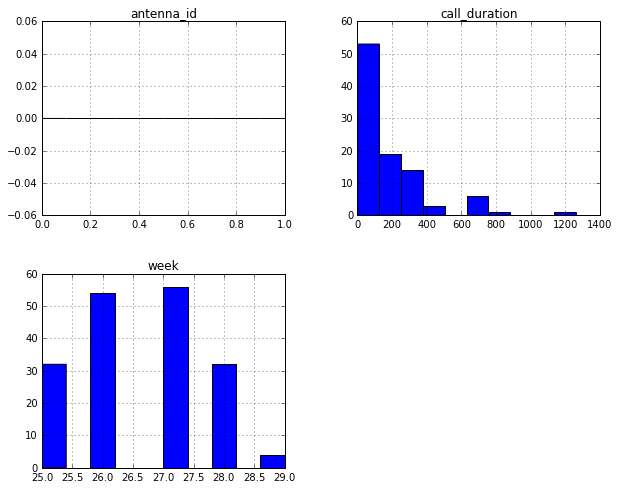

In [6]:
vis = calls.hist()

### 1.5 Manual analysis vs. using Bandicoot

While libraries such as Pandas are great at general data wrangling and analysis, for bespoke applications, this method of analysis can be somewhat tedious. In many cases you have to define what it is that you would like to visualize, and then manually complete the steps. This is where Bandicoot comes in. Using a module that has been created specifically to look at a certain type of data (in this example, mobile phone data) can save you a significant amount of time.

More content about Bandicoot will be provided in Module 5. However, the following section will give you an idea of how powerful these tools are, when used correctly.

#### 1.5.1 Load the input file

In [10]:
U = bc.read_csv("data/metadata_sample", "")

[x] 143 records from 2016-06-21 08:21:52 to 2016-07-19 21:02:11
[x] 57 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network


         call_duration: 35 record(s) with incomplete values
         No antennas file was given and records are using antennas for position.


#### 1.5.2 Export the visualization to disk and embed in this notebook
In order to avoid having to open additional ports on your virtual analysis environment, and potentially on your local network, we can export the visualization to disk and embed it directly in this notebook.

Screenshot supplied of sample file.
![Bandicoot visualization](bc_visualization_screenshot.png "Screenshot of Bandicoot visualization.")

You can execute the code cells below to visualize the input file selected in Section 1.5.1.

In [8]:
# Export the visualization to a new directory, "viz".
bc.visualization.export(U, "viz")

Successfully exported the visualization to viz


'viz'

In [9]:
# Display the exported visualization in a frame within this notebook
IFrame("viz/index.html", "100%", 700)

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>
1. Using the exported visualization, identify the id of the fifth-ranked user by hovering over the Ego network shown, and take a screenshot. Embed the image as your solution to this part of the exercise.
> **Important**: Use the following template to embed the image. This allows the image to be retained in the shared notebook.
>
`from IPython.display import Image
Image(filename="yourImageFilename.ext")`
2. What is the recorded number of interactions observed in Week 03/07 to 09/07? You can obtain this value by changing the view in visualization from "by week" to "all time range".
3. On average, approximately how many interactions are observed on a Thursday evening, rounded to the nearest integer? Show your calculation in a code.

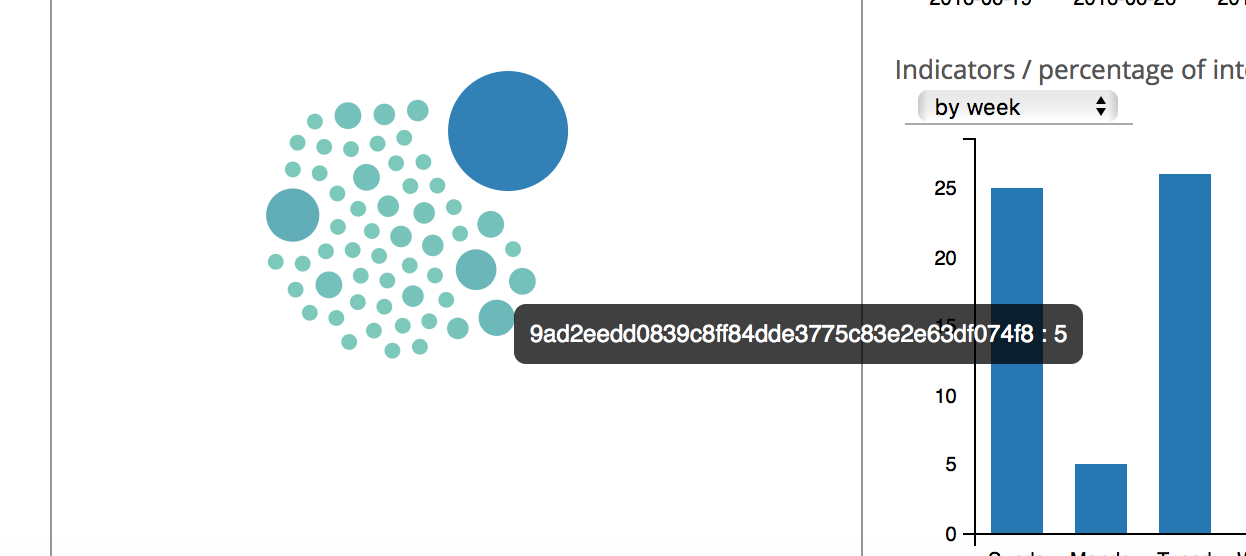

In [1]:
from IPython.display import Image
Image(filename="id5_screenshot.png")

2) 47 interactions for 7/3 - 7/9

In [2]:
#Percent average for thursday times total interactions gives us total thursday interactions. 
#This number divided by 4 weeks is the average number of interactions for a thursday
percentThurs=.125
totalInteractions=143
thursdayTotal=percentThurs*totalInteractions
thursdayAverage=thursdayTotal/4
print(thursdayAverage)


4.46875


<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

<br>
<div class="alert alert-info">
<b>Exercise 2 Start.</b>
</div>

### Instructions
> In Section 1.5.1, the function automatically removes calls with a zero duration. Consider use cases where a zero length call would have a specific meaning, and where would be interested in retaining these records.

>**Note**: In the majority of cases, these records would be removed. However, think about the contents of the data set and what calls of zero duration may signify, if the records were based on your own behavior.

0-duration calls may signify a bad reception area. While driving in my county, reception is lost in some areas, and 0 duration calls could be used to map the "dead zone"

<br>
<div class="alert alert-info">
<b>Exercise 2 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

#### Wrap-up
In Module 5, you will be introduced to [Bandicoot](http://bandicoot.mit.edu/) in more detail,  and explore and use additional features of this library.

# 2. Building Applications using Funf

[Funf](https://github.com/OpenSensing/funf-core-android) was introduced in the video content of this module. You are welcome to review the code on GitHub, download it and create your own application. Funf is a fork of the popular Funf Open Sensing Framework. You can visit the original project's [wiki](https://github.com/funf-org/funf-core-android/wiki) for more detail about architecture design, documentation, and scripts for processing collected data.

Students interested in building their own applications can review the links, and obtain the source from the supplied links. The documentation provides instructions on how to run and modify the source. You can create an application to collect your own data, but will require access to the following additional components:
 - Android SDK.
 - The [application](https://github.com/OpenSensing/android-opensensing) that points to the library.

# 3. Submit your notebook

Please ensure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as", and "IPython Notebook (.ipynb); and
- Submit a copy of this file to the Online Campus.